# Pandas: DataFrames for Python

Python is a general purpose language. It doesn't have to be better than a specialized language, it just has to have a good enough library - it is better at all the other parts, like dealing with files, CLI/GUI, etc.


DataFrames (well known from R) are like Excel spreadsheets in Python. (In fact, it can open Excel files). They are for _structured data_. If a NumPy axis has a meaning you want to assign a name to, it's probably structured.

In [1]:
import numpy as np
import pandas as pd

We could make a DataFrame by hand, most most of the time you'll load them from various data sources. So let's make a CSV:

In [2]:
%%writefile tmp.csv
id,                version, os,    arch
cp37-macos_arm64,  3.7,     macos, arm64
cp38-macos_arm64,  3.8,     macos, arm64
cp39-macos_arm64,  3.9,     macos, arm64
cp37-macos_x86_64, 3.7,     macos, x86_64
cp38-macos_x86_64, 3.8,     macos, x86_64
cp39-macos_x86_64, 3.9,     macos, x86_64

Writing tmp.csv


By default, pandas can read it, and even nicely format something for your screen:

In [3]:
df = pd.read_csv("tmp.csv")
df

,id,version,os,arch
0,cp37-macos_arm64,3.7,macos,arm64
1,cp38-macos_arm64,3.8,macos,arm64
2,cp39-macos_arm64,3.9,macos,arm64
3,cp37-macos_x86_64,3.7,macos,x86_64
4,cp38-macos_x86_64,3.8,macos,x86_64
5,cp39-macos_x86_64,3.9,macos,x86_64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6 non-null      object 
 1                   version  6 non-null      float64
 2    os                      6 non-null      object 
 3       arch                 6 non-null      object 
dtypes: float64(1), object(3)
memory usage: 320.0+ bytes


There are lots of powerful tools when reading and for later cleanup; let's do a better job of importing.

In [5]:
df = pd.read_csv(
    "tmp.csv",
    index_col=0,
    skipinitialspace=True,
    dtype={"os": "category", "arch": "category"},
)
df

,version,os,arch
id,,,
cp37-macos_arm64,3.7,macos,arm64
cp38-macos_arm64,3.8,macos,arm64
cp39-macos_arm64,3.9,macos,arm64
cp37-macos_x86_64,3.7,macos,x86_64
cp38-macos_x86_64,3.8,macos,x86_64
cp39-macos_x86_64,3.9,macos,x86_64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, cp37-macos_arm64 to cp39-macos_x86_64
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   version  6 non-null      float64 
 1   os       6 non-null      category
 2   arch     6 non-null      category
dtypes: category(2), float64(1)
memory usage: 132.0+ bytes


We can quickly see some stats for numerical data:

In [7]:
df.describe()

,version
count,6.000000
mean,3.800000
std,0.089443
min,3.700000
25%,3.725000
50%,3.800000
75%,3.875000
max,3.900000


We can query columns (or anything else):

In [8]:
df["os"]

id
cp37-macos_arm64     macos
cp38-macos_arm64     macos
cp39-macos_arm64     macos
cp37-macos_x86_64    macos
cp38-macos_x86_64    macos
cp39-macos_x86_64    macos
Name: os, dtype: category
Categories (1, object): ['macos']

For simple names, columns can be even easier to access:

In [9]:
df.arch

id
cp37-macos_arm64      arm64
cp38-macos_arm64      arm64
cp39-macos_arm64      arm64
cp37-macos_x86_64    x86_64
cp38-macos_x86_64    x86_64
cp39-macos_x86_64    x86_64
Name: arch, dtype: category
Categories (2, object): ['arm64', 'x86_64']

You have quick, easy access to lots of analysis tools:

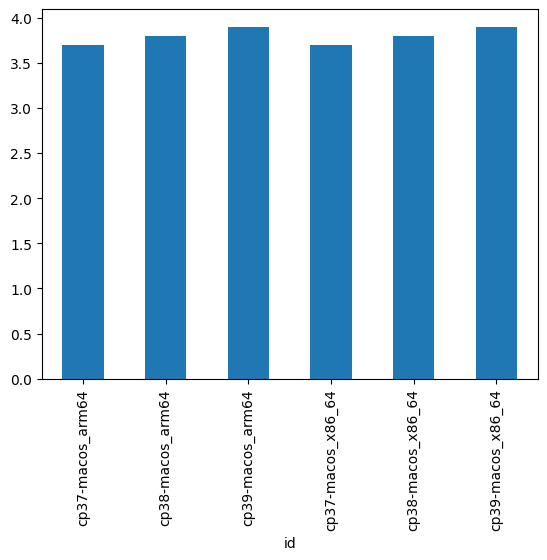

In [10]:
df.version.plot.bar();

You can select using a variety of methods, including NumPy style boolean arrays:

In [11]:
df[df.arch == "arm64"]

,version,os,arch
id,,,
cp37-macos_arm64,3.7,macos,arm64
cp38-macos_arm64,3.8,macos,arm64
cp39-macos_arm64,3.9,macos,arm64


As a reminder, multiple conditions combine like NumPy, with the bitwise operators (Python limitation, and requires extra parenthesis):

In [12]:
df[(df.arch == "arm64") & (df.version >= 3.8)]

,version,os,arch
id,,,
cp38-macos_arm64,3.8,macos,arm64
cp39-macos_arm64,3.9,macos,arm64


The powerful groupby lets you collect and analyze with ease. For example, to compute the mean for each possible arch:

In [13]:
df.groupby("arch", observed=True).version.mean()

arch
arm64     3.8
x86_64    3.8
Name: version, dtype: float64

Or how many of each:

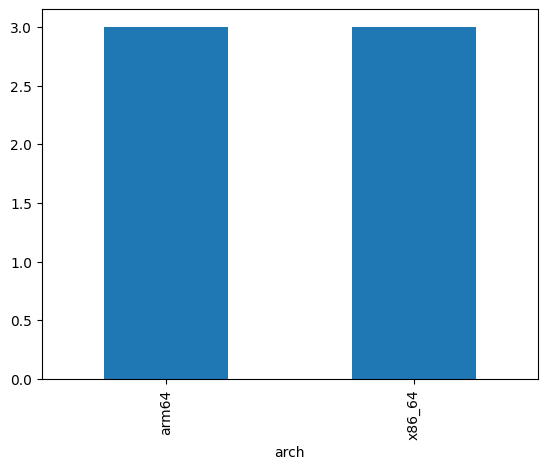

In [14]:
df.groupby("arch", observed=True).version.count().plot.bar();

Pandas pioneered a lot of DSL (Domain Specific Language) for Python, taking over the Python language to keep things simple and consistent within DataFrames. For example, it provides accessors, like the `.str` accessor, that apply normal methods to a series instead:

In [15]:
df.arch.str.upper()

id
cp37-macos_arm64      ARM64
cp38-macos_arm64      ARM64
cp39-macos_arm64      ARM64
cp37-macos_x86_64    X86_64
cp38-macos_x86_64    X86_64
cp39-macos_x86_64    X86_64
Name: arch, dtype: object

Here's another little example of some of the above concepts:

In [16]:
evts = pd.DataFrame({"energy":  np.random.normal(91.2, 2.5, 50)})
evts["is_signal"] = evts.energy.between(89, 93)
evts.groupby("is_signal").energy.mean()

is_signal
False    91.610143
True     90.993974
Name: energy, dtype: float64

This is just scratching the surface. Besides manipulating these dataframes and series, Pandas also offers:

* Fantastic date manipulation, including holidays, work weeks, and more
* Great periodic tools, rolling calculations, and more

Great Pandas, like vectorized NumPy, can be a little hard to write, taking a few iterations, but once you have it written, it is easy to read and very expressive.

## More reading

See this notebook than analyze COVID data that used to run daily on my website: <https://iscinumpy.gitlab.io/post/johns-hopkins-covid/>